# Latent feature perturbations

Perturb each latent feature sequentially

In [1]:
import os
import pandas as pd 
import numpy as np
import pickle
import matplotlib.pyplot as plt
import torch
import seaborn as sns
import copy
import json

from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from scripts.perturbations import latSpacePerturbation_quantileCutoff, applyStdThreshold
from data.prepareData import prepareDataLoader_fromPkl

# Load data and model

In [2]:
# CHR = "chr22"

chr22

Perturbing...

Applying threshold for latent feature: 0


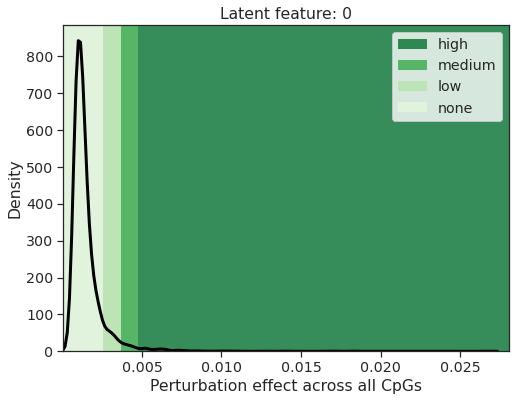

Applying threshold for latent feature: 1


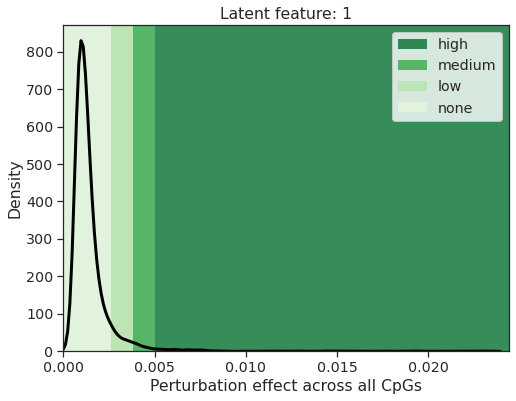

Applying threshold for latent feature: 2


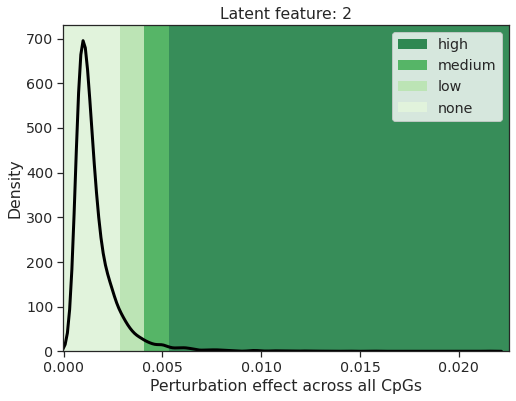

Applying threshold for latent feature: 3


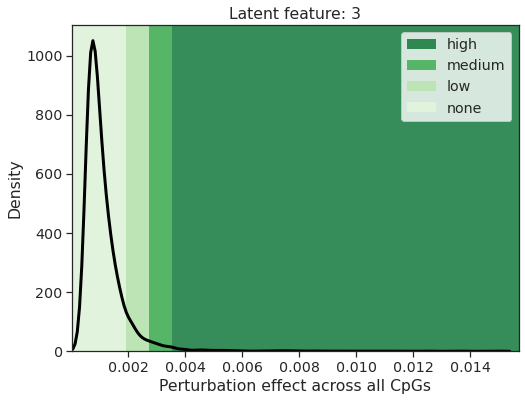

Applying threshold for latent feature: 4


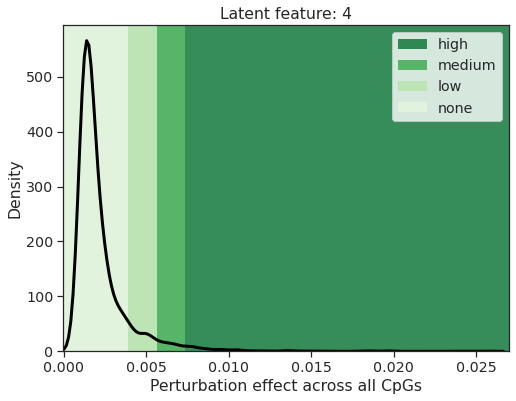

Applying threshold for latent feature: 5


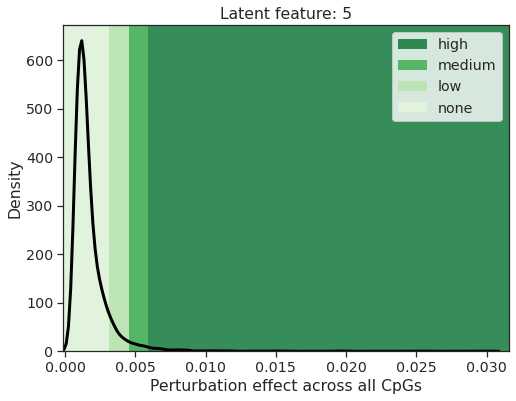

Applying threshold for latent feature: 6


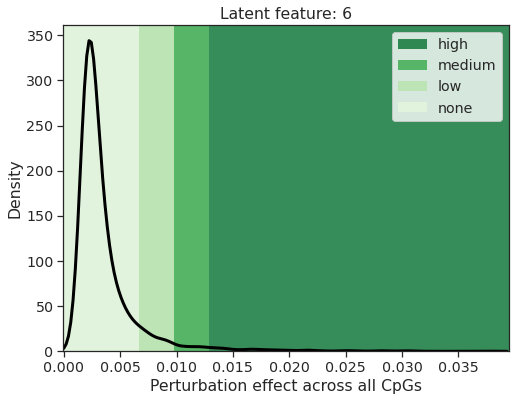

Applying threshold for latent feature: 7


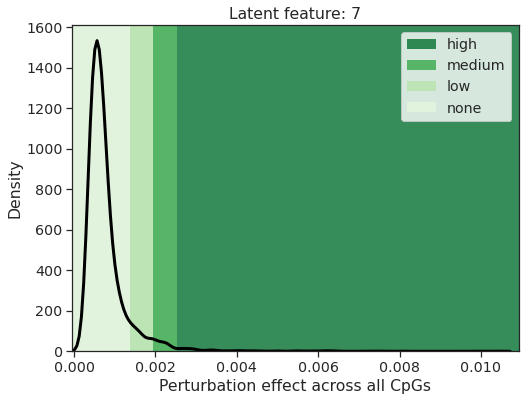

Applying threshold for latent feature: 8


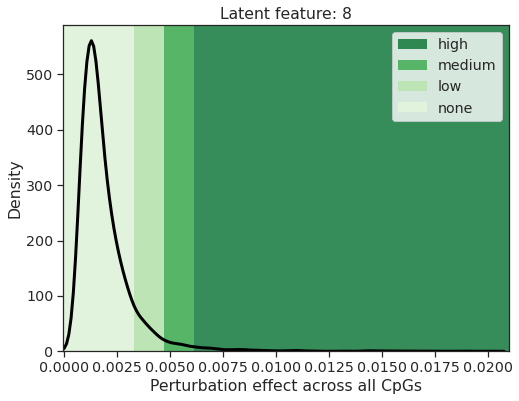

Applying threshold for latent feature: 9


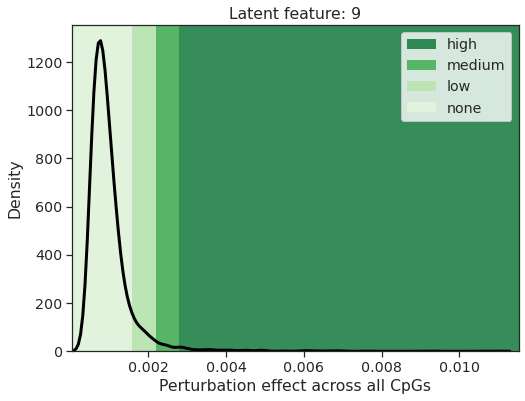

Applying threshold for latent feature: 10


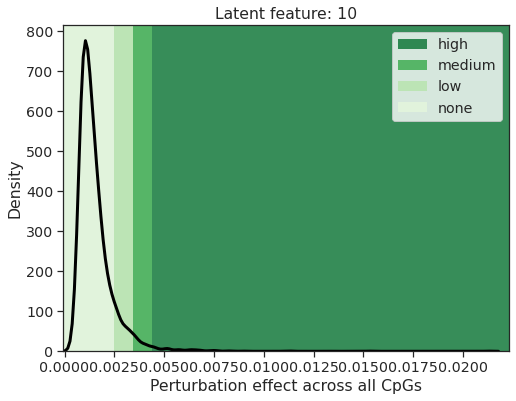

Applying threshold for latent feature: 11


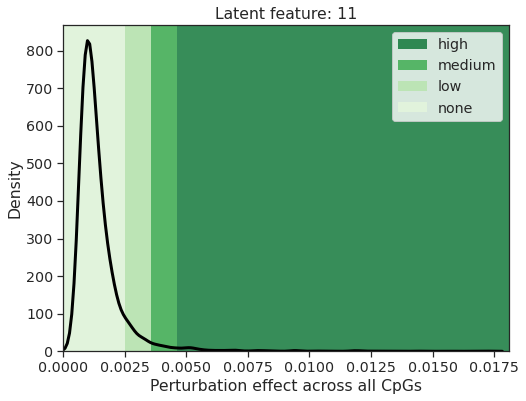

Applying threshold for latent feature: 12


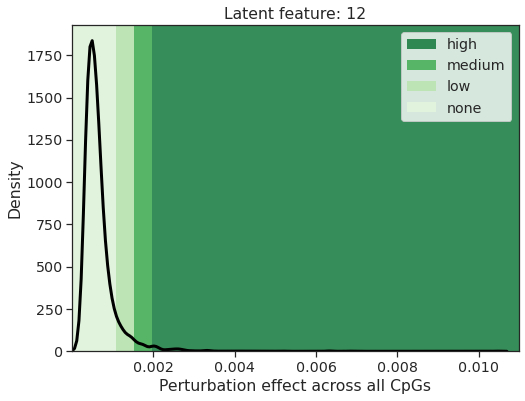

Applying threshold for latent feature: 13


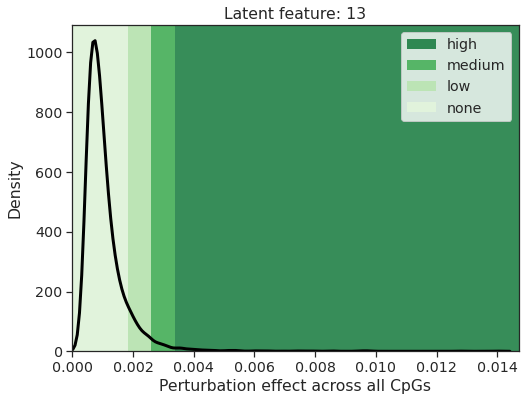

Applying threshold for latent feature: 14


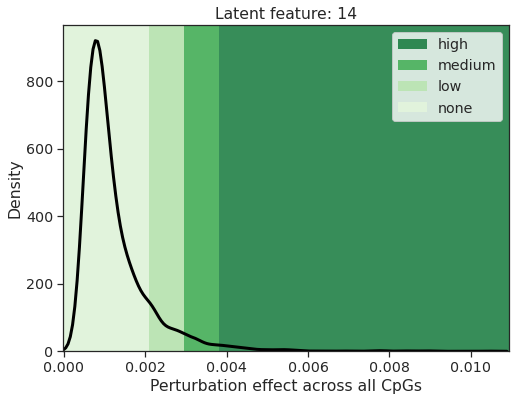

Applying threshold for latent feature: 15


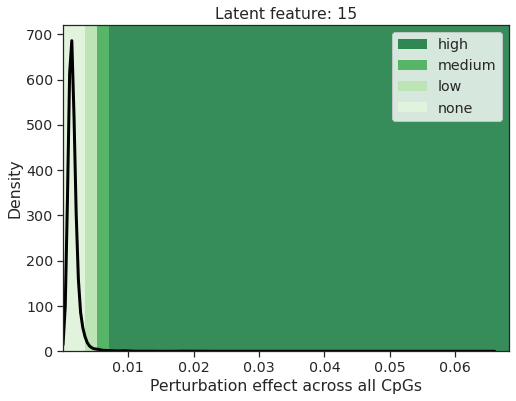

Applying threshold for latent feature: 16


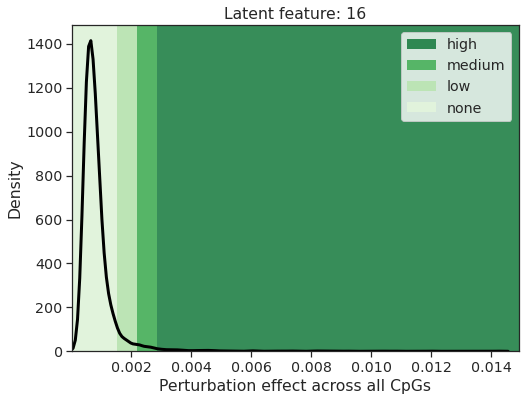

Applying threshold for latent feature: 17


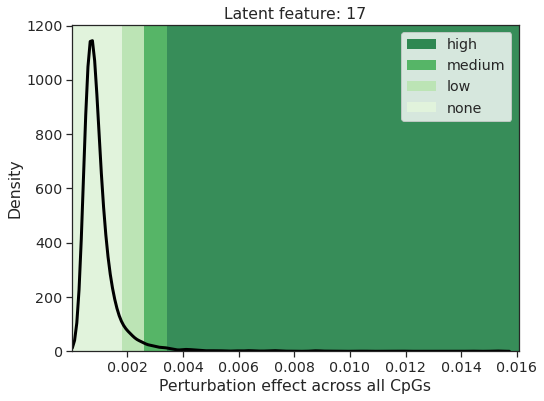

Applying threshold for latent feature: 18


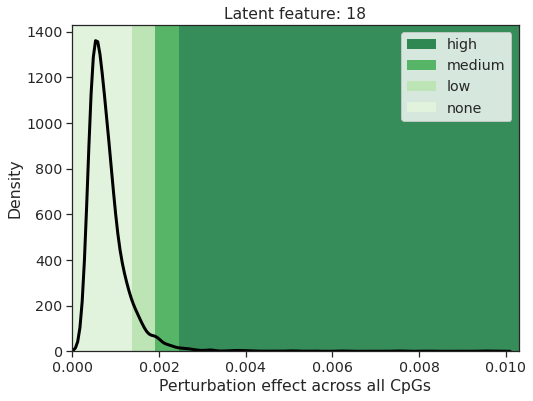

Applying threshold for latent feature: 19


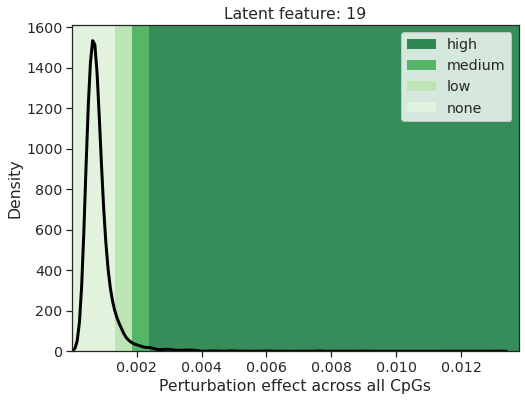

Applying threshold for latent feature: 20


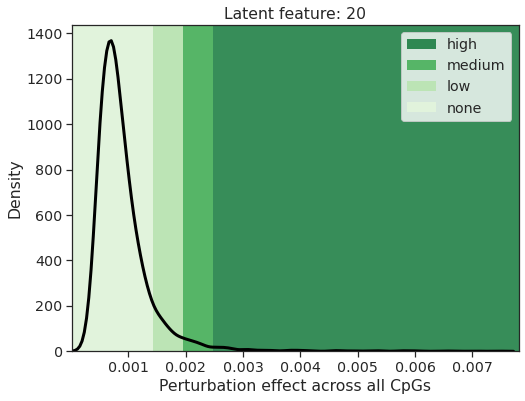

Applying threshold for latent feature: 21


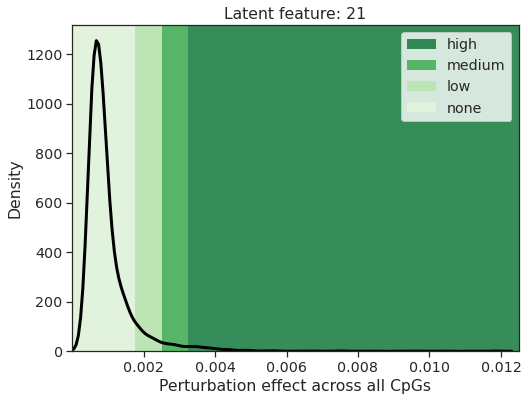

Applying threshold for latent feature: 22


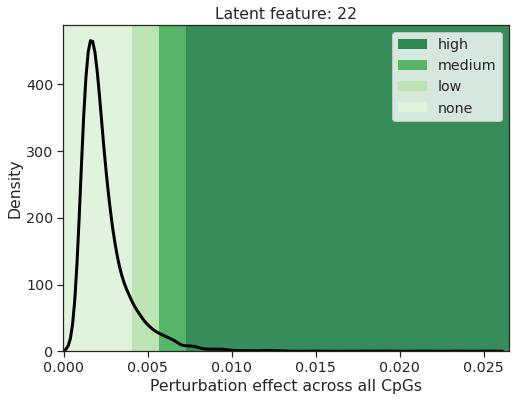

Applying threshold for latent feature: 23


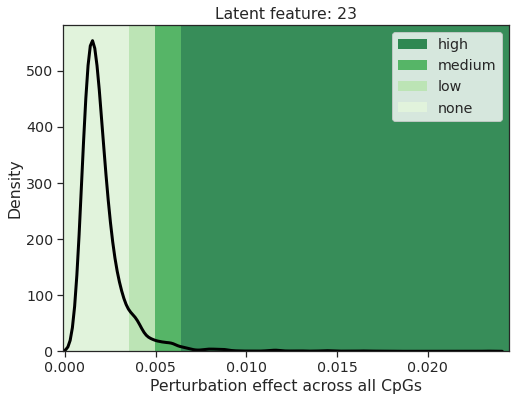

Applying threshold for latent feature: 24


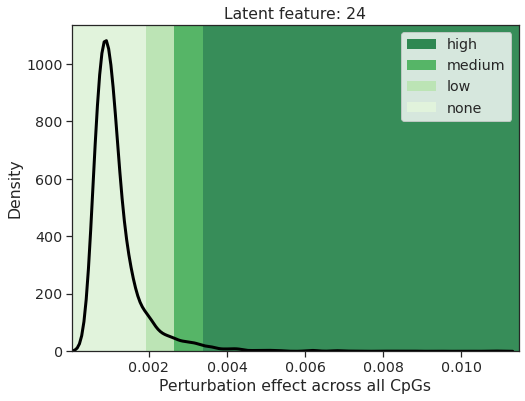

Applying threshold for latent feature: 25


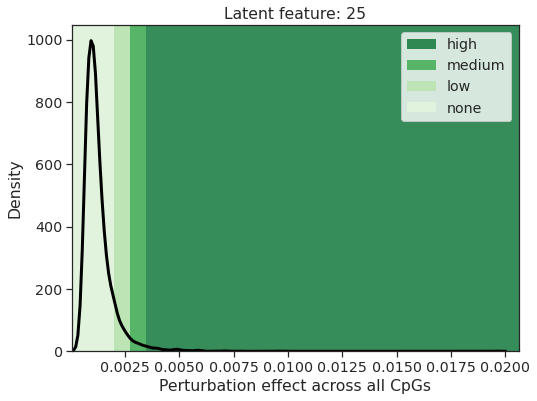

Applying threshold for latent feature: 26


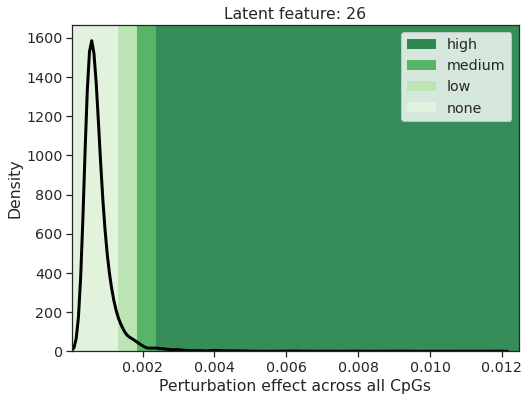

Applying threshold for latent feature: 27


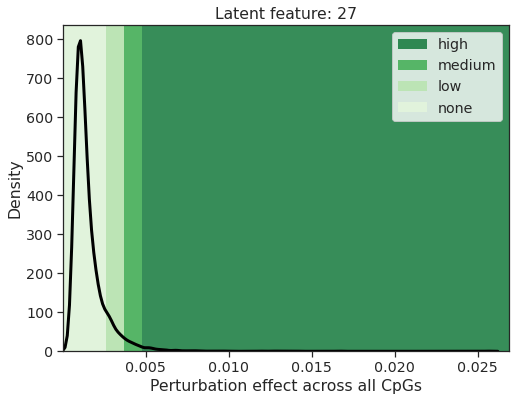

Applying threshold for latent feature: 28


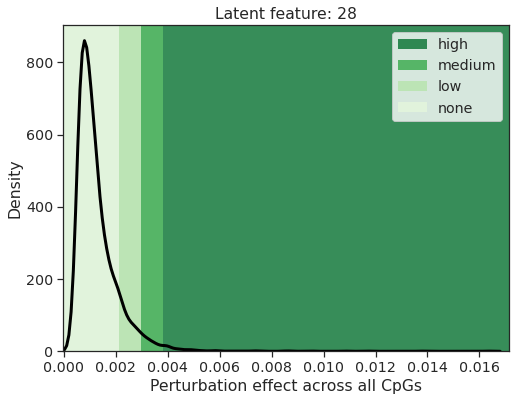

Applying threshold for latent feature: 29


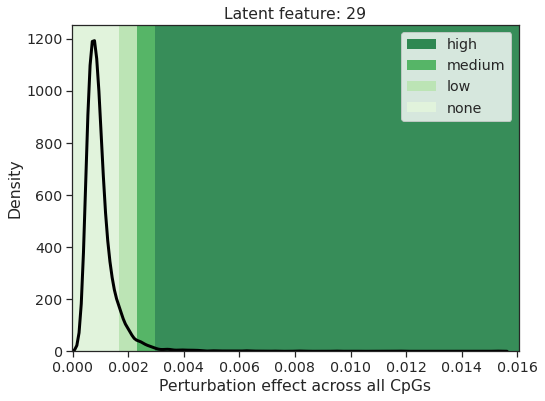

Applying threshold for latent feature: 30


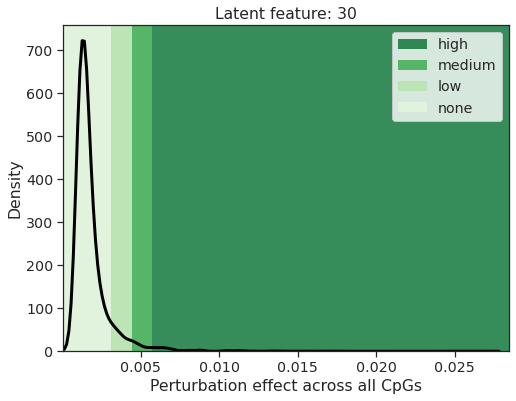

Applying threshold for latent feature: 31


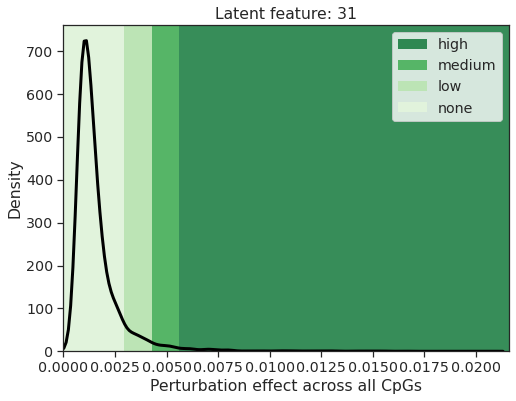

Applying threshold for latent feature: 32


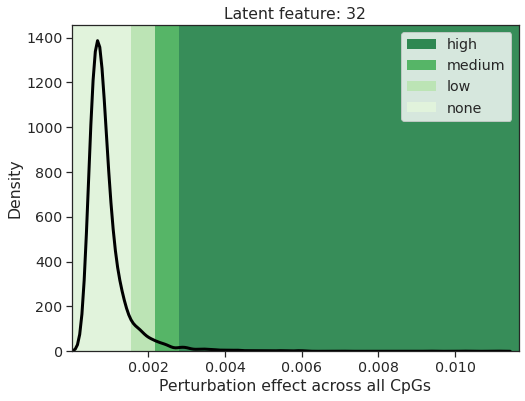

Applying threshold for latent feature: 33


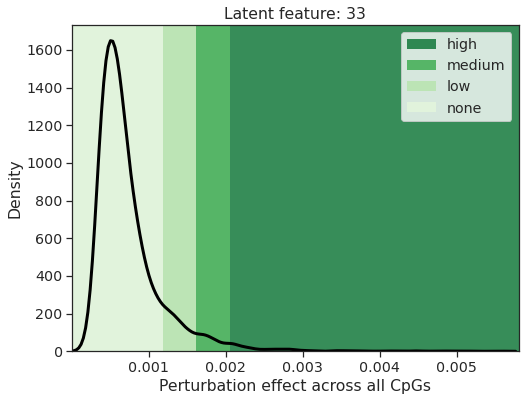

Applying threshold for latent feature: 34


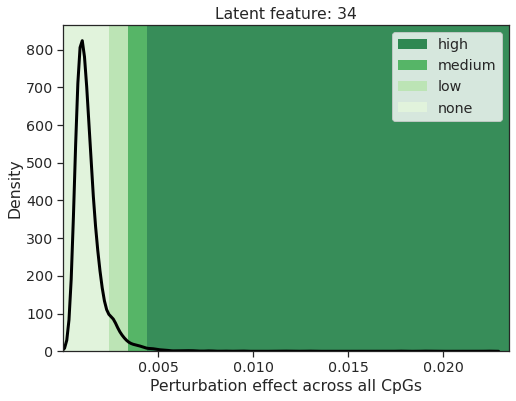

Applying threshold for latent feature: 35


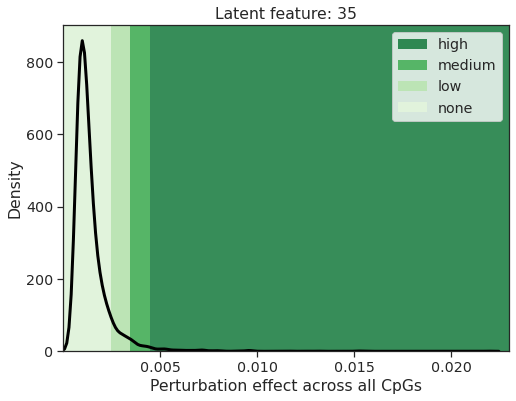

Applying threshold for latent feature: 36


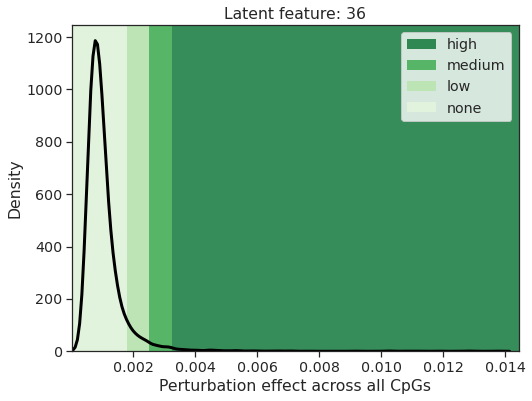

Applying threshold for latent feature: 37


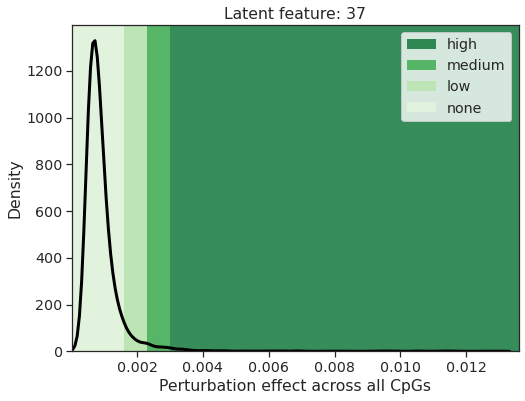

Applying threshold for latent feature: 38


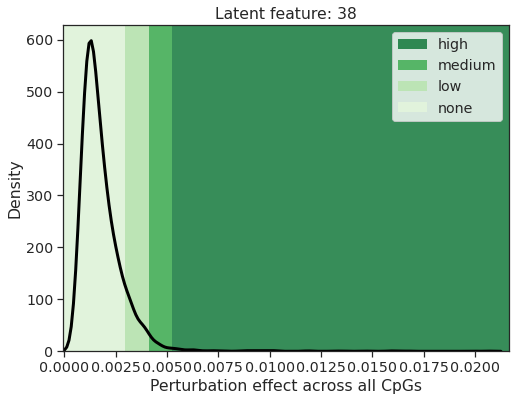

Applying threshold for latent feature: 39


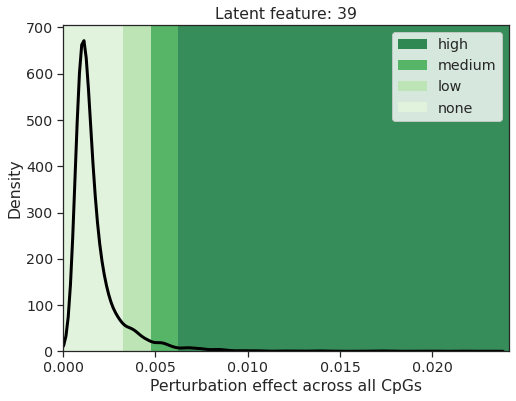

Applying threshold for latent feature: 40


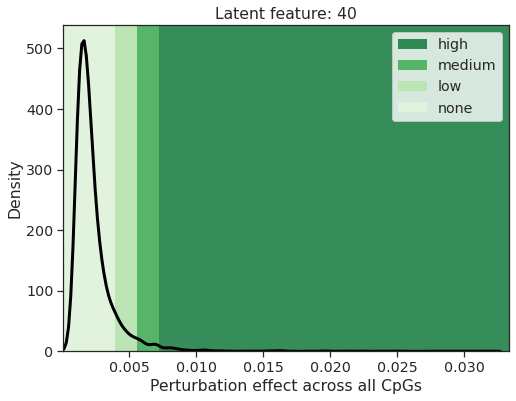

Applying threshold for latent feature: 41


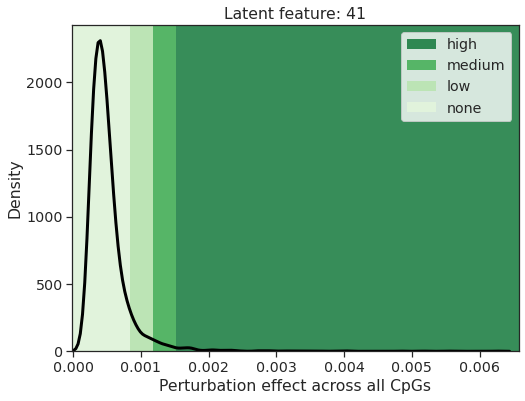

Applying threshold for latent feature: 42


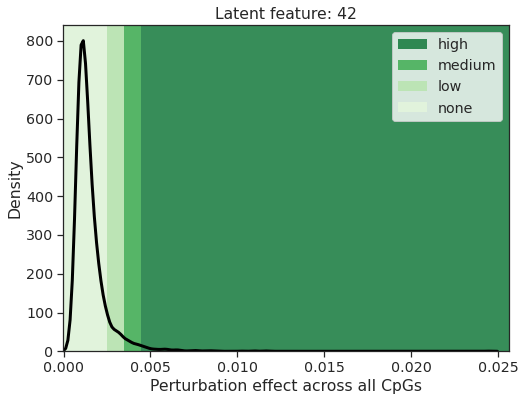

Applying threshold for latent feature: 43


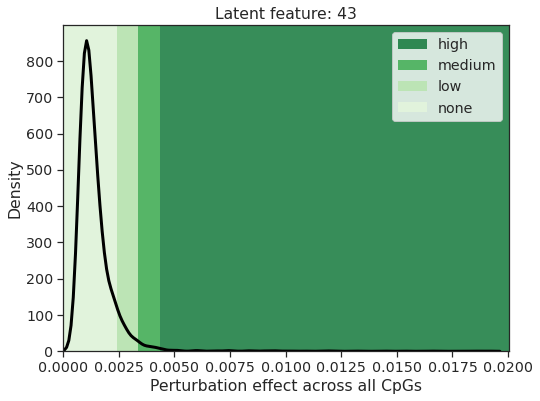

Applying threshold for latent feature: 44


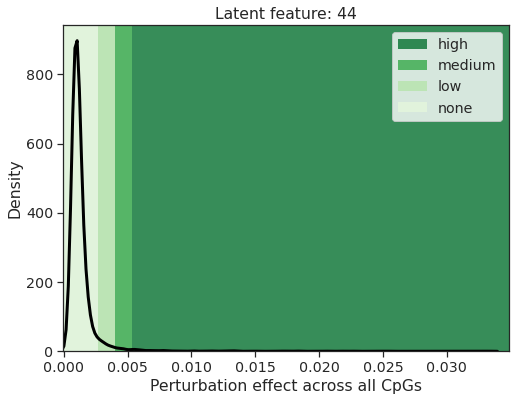

Applying threshold for latent feature: 45


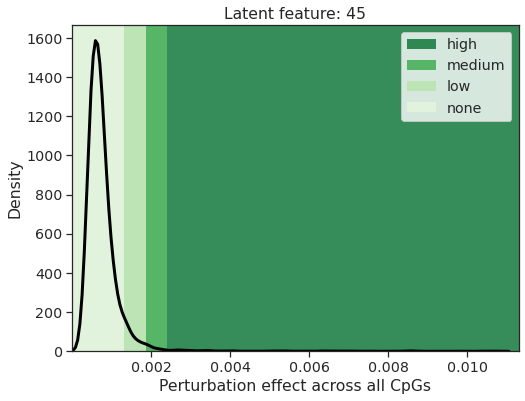

Applying threshold for latent feature: 46


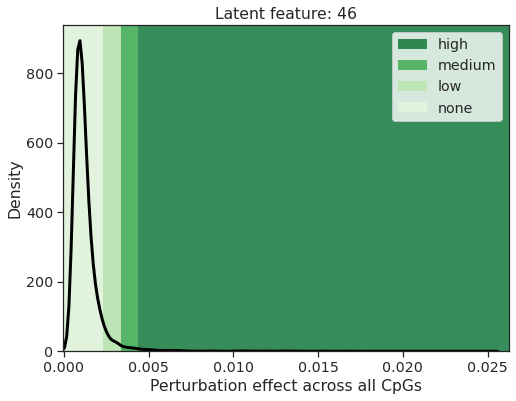

Applying threshold for latent feature: 47


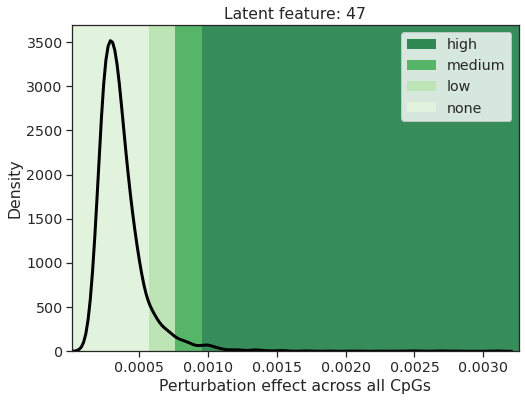

Applying threshold for latent feature: 48


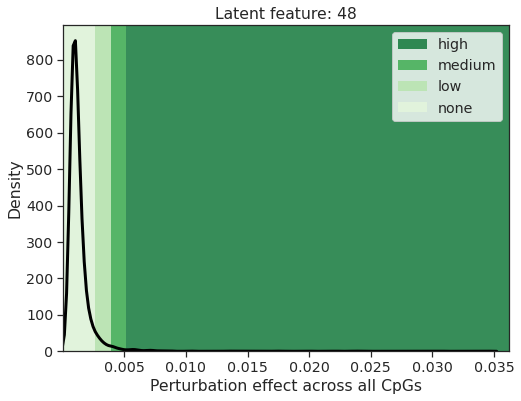

Applying threshold for latent feature: 49


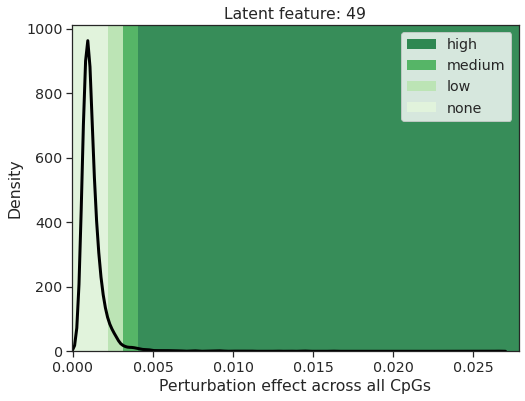

Applying threshold for latent feature: 50


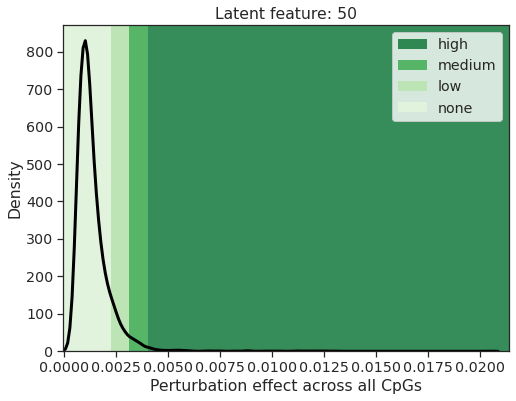

Applying threshold for latent feature: 51


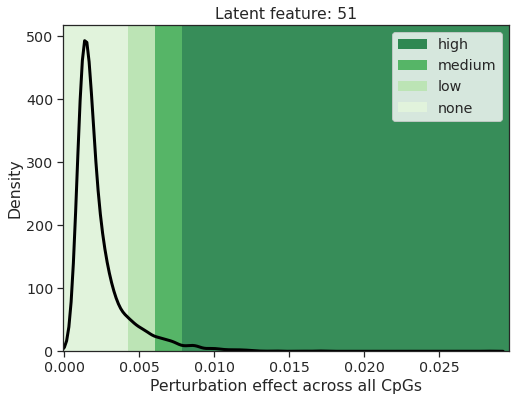

Applying threshold for latent feature: 52


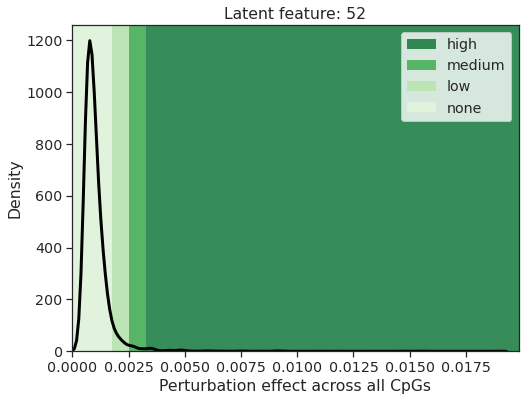

Applying threshold for latent feature: 53


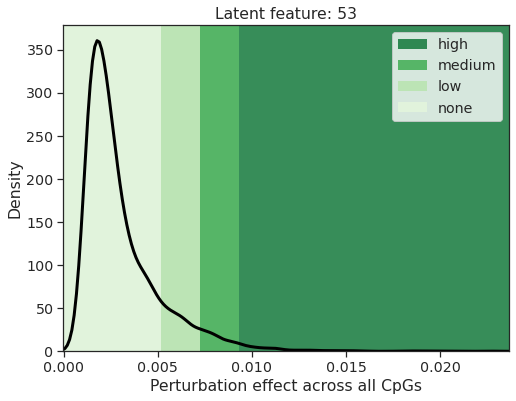

Applying threshold for latent feature: 54


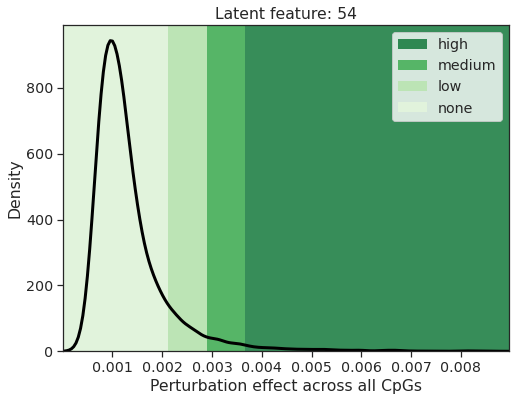

Applying threshold for latent feature: 55


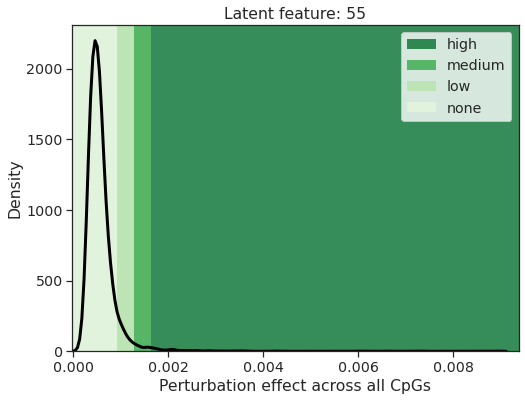

Applying threshold for latent feature: 56


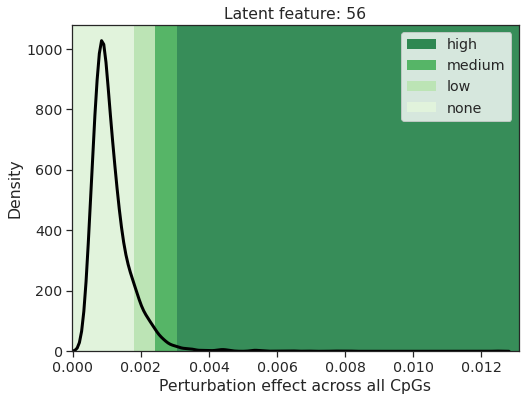

Applying threshold for latent feature: 57


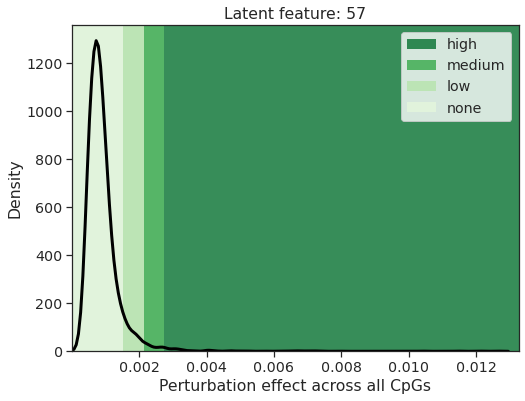

Applying threshold for latent feature: 58


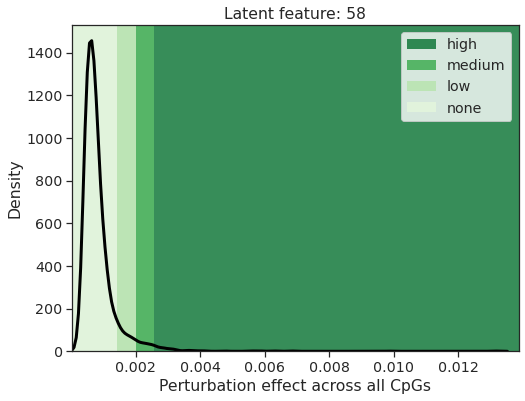

Applying threshold for latent feature: 59


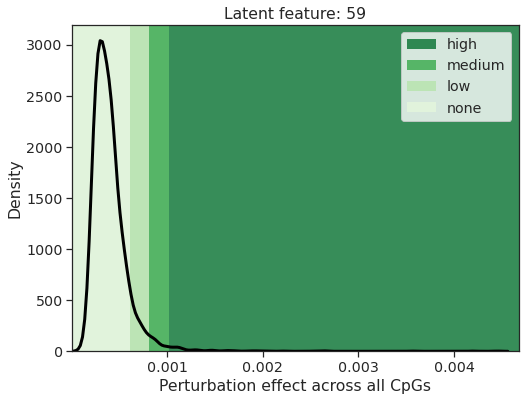

Applying threshold for latent feature: 60


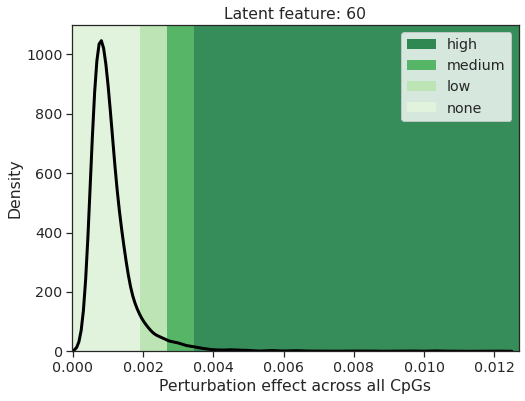

Applying threshold for latent feature: 61


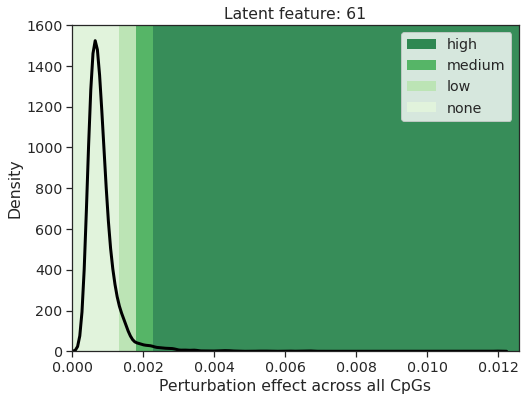

Applying threshold for latent feature: 62


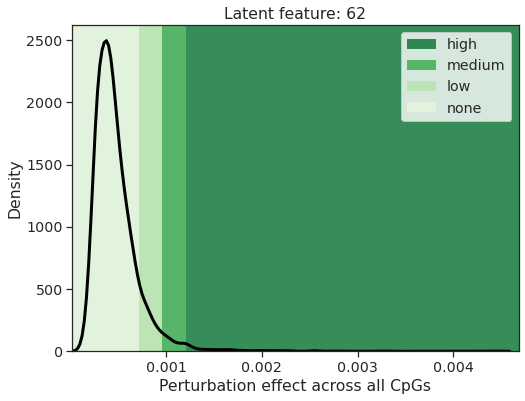

Applying threshold for latent feature: 63


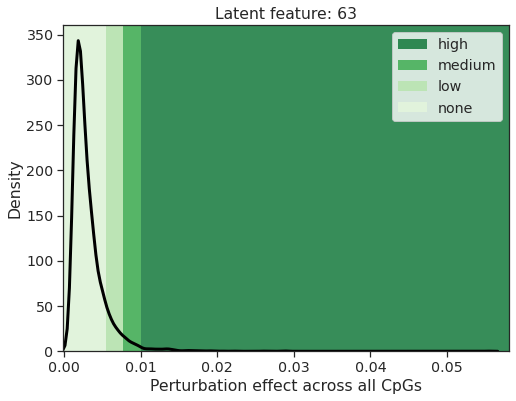

Applying threshold for latent feature: 64


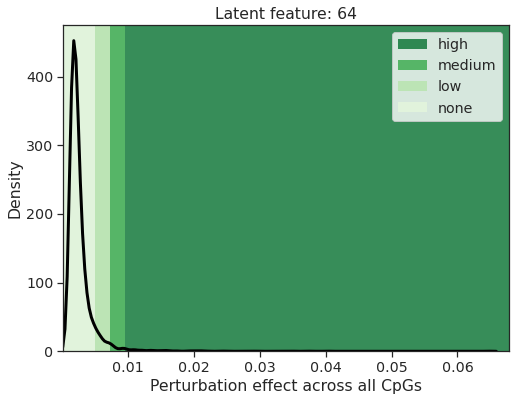

Applying threshold for latent feature: 65


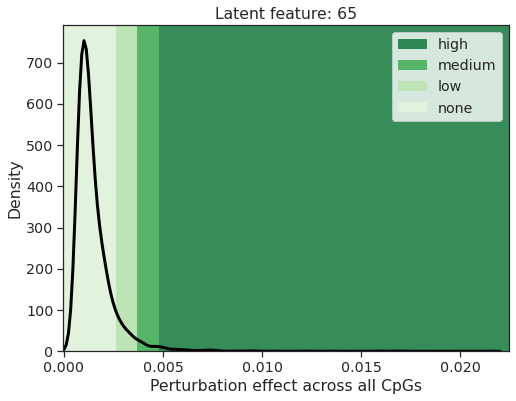

Applying threshold for latent feature: 66


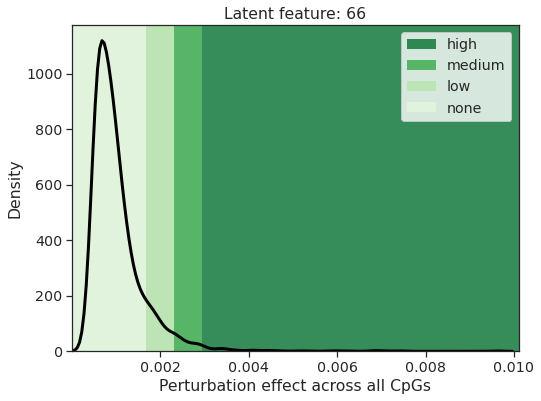

Applying threshold for latent feature: 67


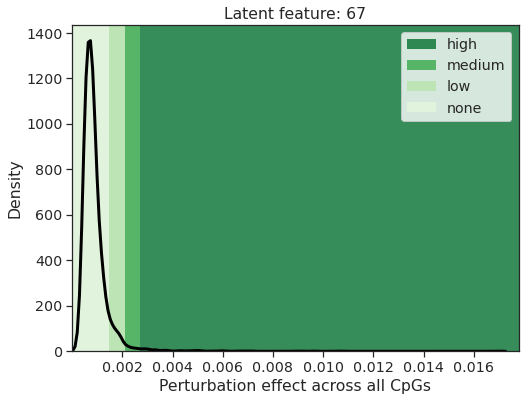

Applying threshold for latent feature: 68


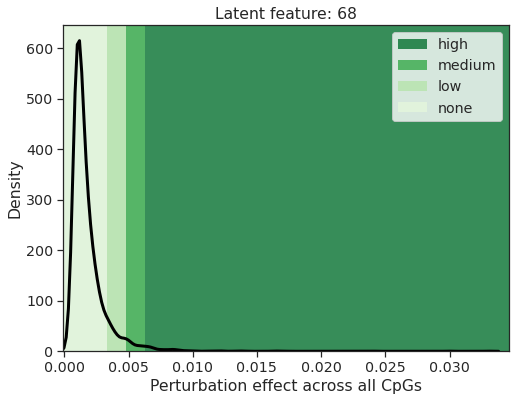

Applying threshold for latent feature: 69


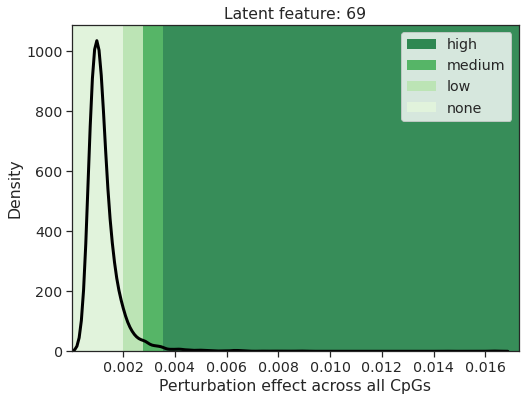


Reordering for focus on CpG


In [2]:
for CHR in [f"chr{i}" for i in range(22,23)]:
    print(CHR)
    PATH_data = "/data/scratch/skatz/PROJECTS/methylnet/1_healthyVAE/data/GSE87571/train_val_test_sets/"
    PATH_model= f"logs/finalModels/{CHR}"

    ''' 
    Load data
    '''
    with open(os.path.join(PATH_data, f"{CHR}_train_methyl_array.pkl"), "rb") as f: train_dataset = pickle.load(f) #
    train_tensor = prepareDataLoader_fromPkl(f"{PATH_data}/{CHR}_train_methyl_array.pkl", colName="Age").returnTensor_()

    with open(os.path.join(PATH_data, f"{CHR}_test_methyl_array.pkl"), "rb") as f: test_dataset = pickle.load(f) #
    test_tensor = torch.tensor(test_dataset["beta"].values, dtype=torch.float32)

    ''' 
    Load model
    '''
    with open(f"{PATH_model}/param_grid.json", "r") as f: dict_bestModel = json.load(f)
        
    #################################
    latSize = dict_bestModel["latentSize"]    ###########   latSize = 25#
    #################################
    
    name = f"latSize_{latSize}"
    model = torch.load(f"{PATH_model}/{name}/checkpoint/trainedModel.pth", map_location=torch.device('cpu'))
    #print(model)
    
    '''
    Carry out perturbations for each latent feature
    '''
    dic_pert = latSpacePerturbation_quantileCutoff(model=model,
                                                data_dic=test_dataset,
                                                name=CHR, 
                                                save_perturbations=False,
                                                plot=True)

# Plot statistics (%) over all chromosomes

# Plot statistics (number of CpGs) for all chromosomes

In [22]:
dic_chr = {}
for CHR in  [f"chr{i}" for i in range(1,23)]: #23
    dic_stat = {}
    PATH_results = f"results/{CHR}/perturbations"
    conn = pd.read_csv(f"{PATH_results}/quantileCutoff_CpGfocus.csv", index_col=0).T    
    
    for col in conn.columns:
        ct = conn.loc[:,col].value_counts()
        ### If we want ratios:
        ## ct = ((conn.loc[:,col].value_counts()/conn.shape[0])*100)
        for cate in [3, 2, 1, 0]:
            if cate in dic_stat.keys():
                dic_stat[cate].append(ct[cate])
            else: 
                dic_stat[cate] = [ct[cate]]          
    dic_chr[CHR] = dic_stat

In [23]:
df = pd.DataFrame(columns=dic_chr.keys(), index=dic_stat.keys())
for CHR in [f"chr{i}" for i in range(1,23)]: #23
    tmp = pd.DataFrame.from_dict(dic_chr[CHR]).mean(axis=0).tolist()
    df.loc[:, CHR] = tmp

In [24]:
df

,chr1,chr2,chr3,chr4,chr5,chr6,chr7,chr8,chr9,chr10,...,chr13,chr14,chr15,chr16,chr17,chr18,chr19,chr20,chr21,chr22
3,440.152778,378.350000,243.800000,210.98,248.526316,347.500000,313.071429,247.159091,111.477273,238.096154,...,137.522222,127.458333,128.354167,173.82,204.050000,53.125000,186.733333,101.454545,43.000000,80.228571
2,561.666667,460.066667,302.355556,238.28,278.289474,377.025641,360.542857,361.272727,160.977273,266.538462,...,183.544444,260.875000,277.791667,415.96,513.116667,67.555556,467.216667,137.375000,41.083333,95.128571
1,1780.666667,1337.366667,889.422222,721.94,835.657895,1287.115385,1102.728571,1026.943182,467.568182,824.346154,...,523.122222,877.666667,926.875000,1397.06,1788.100000,212.402778,1583.433333,438.534091,128.183333,293.342857
0,26699.513889,19808.216667,14111.422222,11928.80,14602.526316,21058.358974,17822.657143,12068.625000,5878.977273,14407.019231,...,6957.811111,8151.000000,8381.979167,11836.16,14538.733333,3320.916667,13237.616667,5889.636364,2506.733333,4774.300000


In [25]:
df.mean(axis=1)

3      208.162761
2      296.173808
1      929.725446
0    12202.301621
dtype: float64

In [26]:
df.std(axis=1)

3     106.840991
2     143.535940
1     475.135186
0    6126.567194
dtype: float64